## Регрессия на imdb

In [1]:
# ячейка импортов
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

# место для импорта регрессионных моделей
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
! unzip "imdb.zip" 

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
data = pd.read_csv('IMDB-Movie-Data.csv') # замените на актуальный путь

data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## Регрессии:

В этом датасете для регрессии есть несколько опций, выбирайте то, что более интересно: 

- определить рейтинг по описанию фильма
- определить длительность фильма по году создания
- определить рейтинг по длине фильма
- Ваша идея

Шаги выполнения: 
- Определите, какие части датасета необходимы для вашей задачи
- Если работаете с текстовыми ячейками, векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку
- Попробуйте обучить [разные регрессионные модели](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) (не забудьте импортировать их в эту тетрадку)

- Для каждой модели посмотрите на метрики. 

Какая/какие модель/ли справляются с выбранной Вами задачей наиболее эффективно?

## EDA

In [4]:
print(data.isnull().values.sum())
print(data.isnull().sum())

192
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


In [5]:
data.dropna(how='any', inplace=True)

In [6]:
print(data.isnull().values.sum())
print(data.isnull().sum())

0
Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


In [7]:
data.drop_duplicates(keep="first", inplace=True)

In [8]:
data = data.reset_index(drop=True)

In [9]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
833,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
834,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
835,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
836,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [10]:
data.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909
Year,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303
Runtime (Minutes),-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397
Rating,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731
Votes,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674
Revenue (Millions),-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 78.7+ KB


In [12]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


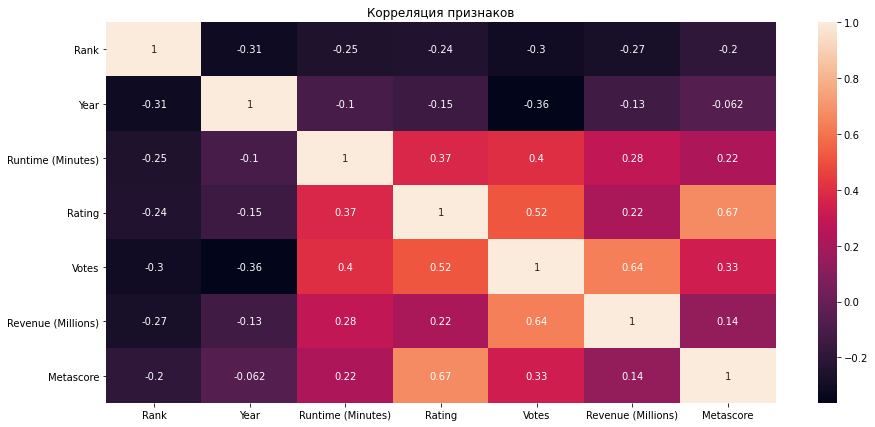

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data=data.corr(), annot=True, cmap= "rocket") 
plt.title("Корреляция признаков")
plt.show()

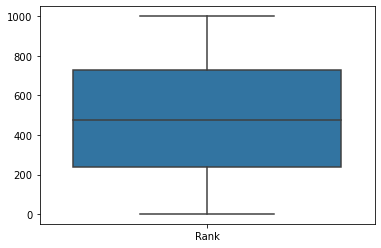

In [15]:
ax = sns.boxplot(data=data[['Rank']])

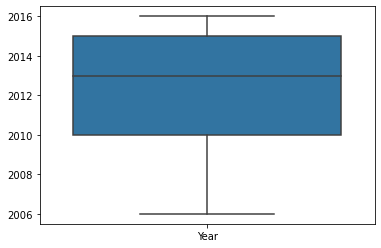

In [16]:
ax = sns.boxplot(data=data[['Year']])

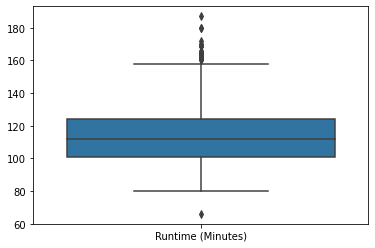

In [17]:
ax = sns.boxplot(data=data[['Runtime (Minutes)']])

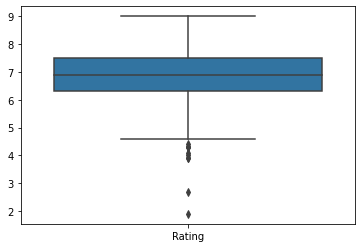

In [18]:
ax = sns.boxplot(data=data[['Rating']])

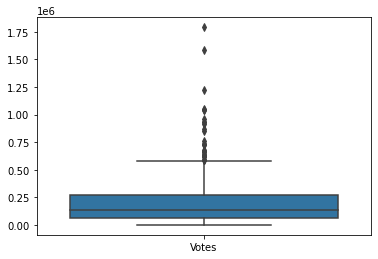

In [19]:
ax = sns.boxplot(data=data[['Votes']])

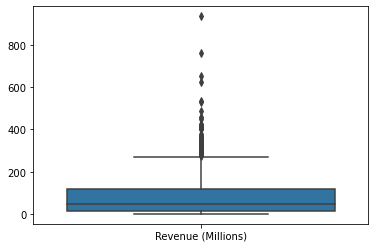

In [20]:
ax = sns.boxplot(data=data[['Revenue (Millions)']])

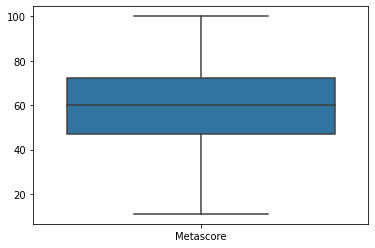

In [21]:
ax = sns.boxplot(data=data[['Metascore']])

**Rating on the basis of Metascore, Votes and Runtime**

In [22]:
data.groupby('Rating').agg(['mean'])

,Rank,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore
,mean,mean,mean,mean,mean,mean
Rating,,,,,,
1.9,830.000000,2008.000000,87.000000,7.720700e+04,14.170000,15.000000
2.7,872.000000,2009.000000,85.000000,5.951200e+04,9.350000,45.000000
3.9,382.000000,2016.000000,94.000000,2.723500e+03,47.730000,46.000000
4.0,617.000000,2016.000000,101.000000,2.770000e+02,20.760000,53.000000
4.1,64.000000,2015.000000,125.000000,2.444740e+05,166.150000,46.000000
4.3,671.666667,2012.666667,113.333333,8.929167e+04,53.423333,24.000000
4.4,937.000000,2009.000000,92.000000,6.065500e+04,0.180000,33.000000
4.6,672.000000,2015.500000,91.500000,2.086750e+04,19.580000,26.000000


**Regression plots**

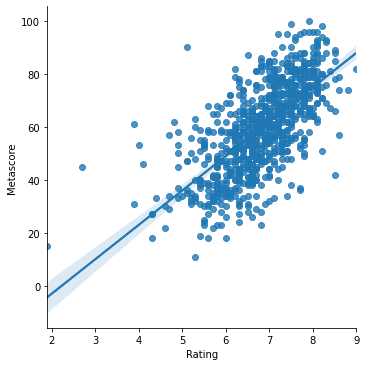

In [23]:
sns.lmplot(x ='Rating', y='Metascore', data = data)

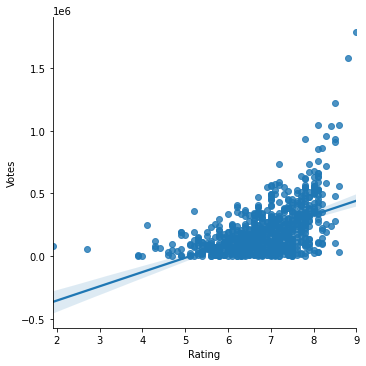

In [24]:
sns.lmplot(x ='Rating', y='Votes', data = data)

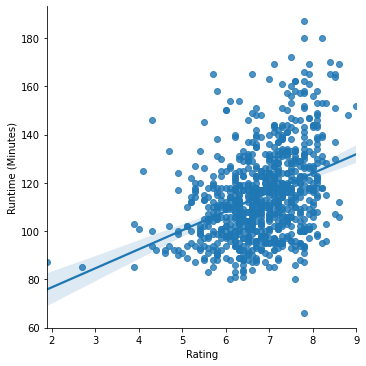

In [25]:
sns.lmplot(x ='Rating', y='Runtime (Minutes)', data = data)

In [117]:
data1 = data[['Rating', 'Metascore', 'Votes', 'Runtime (Minutes)']].copy(deep = 'True')

In [118]:
data1

,Rating,Metascore,Votes,Runtime (Minutes)
0,8.1,76.0,757074,121
1,7.0,65.0,485820,124
2,7.3,62.0,157606,117
3,7.2,59.0,60545,108
4,6.2,40.0,393727,123
...,...,...,...,...
833,5.9,37.0,140900,97
834,6.7,48.0,164088,88
835,5.5,46.0,73152,94
836,6.2,50.0,70699,98


**Data distribution**

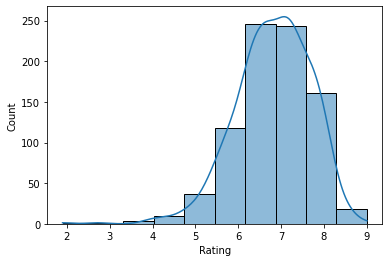

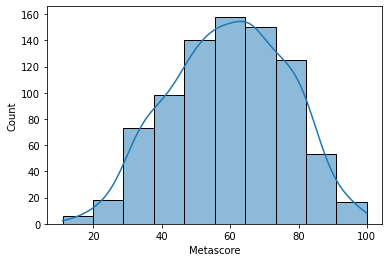

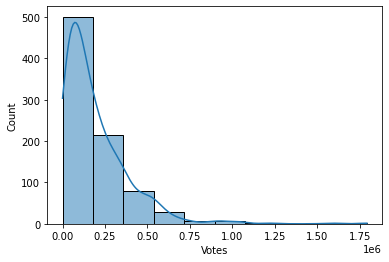

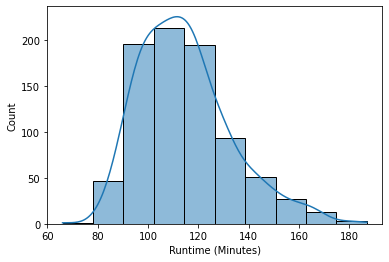

In [119]:
for column in data1.columns:
    plt.figure()           
    sns.histplot(data1[column], bins=10, kde=True)

**Train / test set splitting**

In [149]:
X = data1.drop(['Rating'], axis=1)
y = data1['Rating']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

**Functions to see metrics**

In [151]:
def val(model, data):
    pred = cross_val_score(model, X, y)
    coef = list(zip(data.columns, model.coef_))
    return pred.mean(), coef

def print_val(model, data):
    pred = cross_val_score(model, X, y)
    coef = list(zip(data.columns, model.coef_))
    print('cross_val:', pred.mean())
    print('coef:', coef) 
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)

**Linear Regression**

In [152]:
lr=LinearRegression(normalize=True)
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [153]:
print_val(lr, data1)

cross_val: 0.524891350688171
coef: [('Rating', 0.0273544923644187), ('Metascore', 1.2653533641150347e-06), ('Votes', 0.005616527216799001)]


In [154]:
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

print('\nTest set evaluation:\n')
print_evaluate(y_test, test_pred)


Train set evaluation:

MAE: 0.4254861405889546
MSE: 0.3252025979068637
RMSE: 0.570265374985071
R2 Square: 0.5487595498579707

Test set evaluation:

MAE: 0.40151970667890763
MSE: 0.36362689587083913
RMSE: 0.6030148388479666
R2 Square: 0.6027382783639778


In [155]:
results_df_len = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , *val(lr, data1)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation", "Coef"])
results_df_len

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation,Coef
0,Linear Regression,0.40152,0.363627,0.603015,0.602738,0.524891,"[(Rating, 0.0273544923644187), (Metascore, 1.2..."


In [156]:
# Введем новые данные и посмотрим, насколько точным получится предсказанное значение.

In [157]:
data[data['Title'].str.contains('Good Will Hunting')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [158]:
lr.predict(np.array([70.0, 883669, 126]).reshape(1, -1))

array([8.04980914])

In [159]:
# Модель ошиблась на 0.3

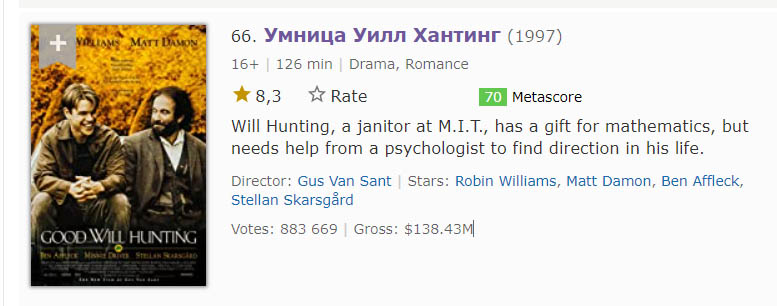

**Ridge Regression**

In [160]:
rg=Ridge(alpha=1000)
rg.fit(X_train, y_train)
train_pred = rg.predict(X_train)
test_pred = rg.predict(X_test)

In [161]:
print_val(rg, data1)

cross_val: 0.5248314652290013
coef: [('Rating', 0.027186431894089248), ('Metascore', 1.2709264037639565e-06), ('Votes', 0.005596573148978247)]


In [162]:
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

print('\nTest set evaluation:\n')
print_evaluate(y_test, test_pred)


Train set evaluation:

MAE: 0.4256008267447275
MSE: 0.3252100511535576
RMSE: 0.5702719098408737
R2 Square: 0.5487492079775096

Test set evaluation:

MAE: 0.40149959129561386
MSE: 0.3640973917637274
RMSE: 0.6034048324000458
R2 Square: 0.6022242624576903


In [163]:
results_df_len_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , *val(rg, data1)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation", "Coef"])
results_df_len = results_df_len.append(results_df_len_2, ignore_index=True)
results_df_len

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation,Coef
0,Linear Regression,0.40152,0.363627,0.603015,0.602738,0.524891,"[(Rating, 0.0273544923644187), (Metascore, 1.2..."
1,Ridge Regression,0.40150,0.364097,0.603405,0.602224,0.524831,"[(Rating, 0.027186431894089248), (Metascore, 1..."


In [164]:
rg.predict(np.array([70.0, 883669, 126]).reshape(1, -1))

array([8.05167952])

**Lasso Regression**

In [165]:
ls=Lasso(alpha=0.00001)
ls.fit(X_train, y_train)
train_pred = ls.predict(X_train)
test_pred = ls.predict(X_test)

In [166]:
print_val(ls, data1)

cross_val: 0.5248913434117541
coef: [('Rating', 0.027354456377231242), ('Metascore', 1.2653557717051922e-06), ('Votes', 0.005616491084498495)]


In [167]:
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

print('\nTest set evaluation:\n')
print_evaluate(y_test, test_pred)


Train set evaluation:

MAE: 0.42548615116014865
MSE: 0.32520259790758477
RMSE: 0.5702653749857033
R2 Square: 0.5487595498569702

Test set evaluation:

MAE: 0.40151971684945353
MSE: 0.3636270836307455
RMSE: 0.6030149945322633
R2 Square: 0.6027380732366219


In [168]:
results_df_len_3 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , *val(ls, data1)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation", "Coef"])
results_df_len = results_df_len.append(results_df_len_3, ignore_index=True)
results_df_len

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation,Coef
0,Linear Regression,0.40152,0.363627,0.603015,0.602738,0.524891,"[(Rating, 0.0273544923644187), (Metascore, 1.2..."
1,Ridge Regression,0.40150,0.364097,0.603405,0.602224,0.524831,"[(Rating, 0.027186431894089248), (Metascore, 1..."
2,Lasso Regression,0.40152,0.363627,0.603015,0.602738,0.524891,"[(Rating, 0.027354456377231242), (Metascore, 1..."


In [169]:
ls.predict(np.array([70.0, 883669, 126]).reshape(1, -1))

array([8.04981001])

**ElasticNet**

In [170]:
el_net = ElasticNet(alpha=0.00001)
el_net.fit(X_train, y_train)
train_pred = el_net.predict(X_train)
test_pred = el_net.predict(X_test)

In [171]:
print_val(el_net, data1)

cross_val: 0.5248913468884832
coef: [('Rating', 0.027354473842044737), ('Metascore', 1.2653545854965602e-06), ('Votes', 0.005616509087489623)]


In [172]:
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

print('\nTest set evaluation:\n')
print_evaluate(y_test, test_pred)


Train set evaluation:

MAE: 0.42548614623546493
MSE: 0.32520259790705
RMSE: 0.5702653749852343
R2 Square: 0.5487595498577122

Test set evaluation:

MAE: 0.40151971170080497
MSE: 0.36362699120699804
RMSE: 0.6030149178975576
R2 Square: 0.6027381742093976


In [173]:
results_df_len_4 = pd.DataFrame(data=[["ElasticNet", *evaluate(y_test, test_pred) , *val(el_net, data1)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation", "Coef"])
results_df_len = results_df_len.append(results_df_len_4, ignore_index=True)
results_df_len

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation,Coef
0,Linear Regression,0.40152,0.363627,0.603015,0.602738,0.524891,"[(Rating, 0.0273544923644187), (Metascore, 1.2..."
1,Ridge Regression,0.40150,0.364097,0.603405,0.602224,0.524831,"[(Rating, 0.027186431894089248), (Metascore, 1..."
2,Lasso Regression,0.40152,0.363627,0.603015,0.602738,0.524891,"[(Rating, 0.027354456377231242), (Metascore, 1..."
3,ElasticNet,0.40152,0.363627,0.603015,0.602738,0.524891,"[(Rating, 0.027354473842044737), (Metascore, 1..."


In [174]:
el_net.predict(np.array([70.0, 883669, 126]).reshape(1, -1))

array([8.04980958])

In [ ]:
# Все модели дали практически одинаковый результат, у Ridge Regression MAE меньше на 0.00002 (не существенно)